### Credit Data Analysis
    * EDA
    * Logistic Regression Model
    * Decision Tree Model
    * Support Vector Machine Model

In [10]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer

In [11]:
train_data=pd.read_csv('cs-training.csv')
train_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
total = train_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((train_data.isnull().sum(axis=0)/train_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
MonthlyIncome,29731,19.820667
NumberOfDependents,3924,2.616000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberOfOpenCreditLinesAndLoans,0,0.000000
DebtRatio,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
age,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000


In [13]:
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(train_data[['MonthlyIncome']])
train_data['MonthlyIncome'] = imp_mean.transform(train_data[['MonthlyIncome']])

In [14]:
train_data = train_data.copy().dropna(how='any')
train_data.shape

(146076, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146076 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              146076 non-null int64
SeriousDlqin2yrs                        146076 non-null int64
RevolvingUtilizationOfUnsecuredLines    146076 non-null float64
age                                     146076 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    146076 non-null int64
DebtRatio                               146076 non-null float64
MonthlyIncome                           146076 non-null float64
NumberOfOpenCreditLinesAndLoans         146076 non-null int64
NumberOfTimes90DaysLate                 146076 non-null int64
NumberRealEstateLoansOrLines            146076 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    146076 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 14.5 MB


In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,146076.0,75013.668597,43290.647551,1.0,37534.750000,75013.500000,112496.250000,150000.0
SeriousDlqin2yrs,146076.0,0.067410,0.250732,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,146076.0,5.922272,250.070774,0.0,0.031018,0.158818,0.563684,50708.0
age,146076.0,52.099277,14.604005,0.0,41.000000,52.000000,62.000000,107.0
NumberOfTime30-59DaysPastDueNotWorse,146076.0,0.407945,4.002747,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,146076.0,333.373603,1943.906679,0.0,0.171764,0.357751,0.766117,329664.0
MonthlyIncome,146076.0,6670.221237,13052.302408,0.0,3820.000000,6415.000000,7500.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,146076.0,8.529279,5.149533,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,146076.0,0.250698,3.977197,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,146076.0,1.029717,1.132774,0.0,0.000000,1.000000,2.000000,54.0


The summary statistics for SeriousDlqin2yrs does not make any sense, as it is a categorical variable.

### Exploratory Data Analysis

In [8]:
#0 Number of people who have experienced 90 days past due delinquency or worse.
train_data_delinquent=train_data['SeriousDlqin2yrs'].value_counts()
train_data_delinquent

0    136229
1      9847
Name: SeriousDlqin2yrs, dtype: int64

In [12]:
#1 How does age play role in delinquency?

In [9]:
age_count=train_data[['age','SeriousDlqin2yrs']].groupby(['age','SeriousDlqin2yrs']).size().reset_index()
age_count.columns=['age','SeriousDlqin2yrs','count']
age_count['age']=age_count['age']//10*10

In [10]:
grouped=age_count.groupby(['age','SeriousDlqin2yrs'])
for name,group in grouped:
    print(name)
    print(group['count'].sum())

(0, 0)
1
(20, 0)
7436
(20, 1)
993
(30, 0)
20579
(30, 1)
2312
(40, 0)
31142
(40, 1)
2850
(50, 0)
32343
(50, 1)
2235
(60, 0)
27023
(60, 1)
1023
(70, 0)
12600
(70, 1)
320
(80, 0)
4551
(80, 1)
102
(90, 0)
545
(90, 1)
11
(100, 0)
9
(100, 1)
1


So we can conclude from this data that people in their forties have defaulted the most on their loans.

In [33]:
#3 How is monthly income related to delinquency?

In [8]:
income_count=train_data[['MonthlyIncome','SeriousDlqin2yrs']].groupby(['MonthlyIncome','SeriousDlqin2yrs']).size().reset_index()
income_count.columns=['MonthlyIncome','SeriousDlqin2yrs','count']

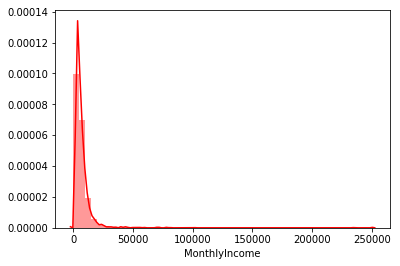

In [9]:
#sns.distplot(income_count[income_count.SeriousDlqin2yrs ==0]['MonthlyIncome'], color='b')
sns.distplot(income_count[income_count.SeriousDlqin2yrs ==1]['MonthlyIncome'], color='r')

Null Hypothesis: Monthly income does not affect whether the person would be delinquent or not.
Alternate Hypothesis: Monthly income does affect whether the person would be delinquent or not.

In [10]:
stats.ttest_ind(income_count[income_count.SeriousDlqin2yrs==1]['MonthlyIncome'],income_count[income_count.SeriousDlqin2yrs==0]['MonthlyIncome'] )

Ttest_indResult(statistic=-5.59675246930332, pvalue=2.218825771826394e-08)

In [22]:
#4 How DebtRatio affect delinquency of a person?

Text(0.5,0,'Debt Ratio')

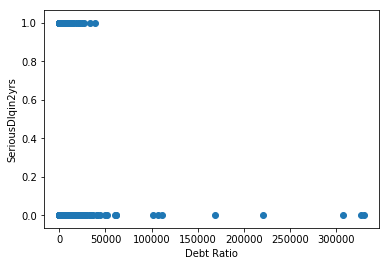

In [31]:
plt.scatter(train_data['DebtRatio'],train_data['SeriousDlqin2yrs'])
plt.ylabel('SeriousDlqin2yrs')
plt.xlabel('Debt Ratio')

Text(0.5,0,'RevolvingUtilizationOfUnsecuredLines')

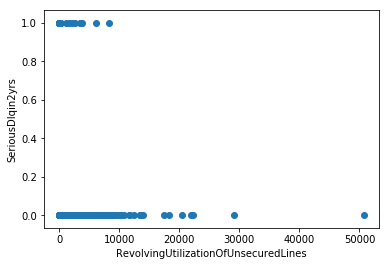

In [33]:
plt.scatter(train_data['RevolvingUtilizationOfUnsecuredLines'],train_data['SeriousDlqin2yrs'])
plt.ylabel('SeriousDlqin2yrs')
plt.xlabel('RevolvingUtilizationOfUnsecuredLines')

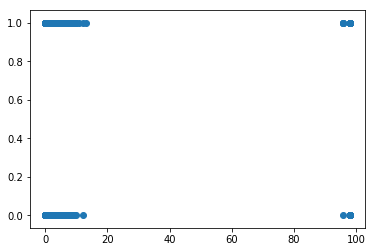

In [34]:
plt.scatter(train_data['NumberOfTime30-59DaysPastDueNotWorse'],train_data['SeriousDlqin2yrs'])

In [12]:
train_data['NumberOfTime30-59DaysPastDueNotWorse'].max()

98

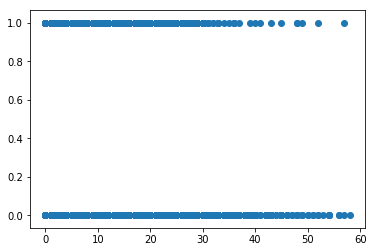

In [36]:
plt.scatter(train_data['NumberOfOpenCreditLinesAndLoans'],train_data['SeriousDlqin2yrs'])

In [13]:
from scipy.stats import pearsonr

In [14]:
for att in train_data.columns:
    print(att)
    print(pearsonr(train_data[att],train_data['SeriousDlqin2yrs']))

Unnamed: 0
(0.00286295955523407, 0.27386162621416343)
SeriousDlqin2yrs
(1.0, 0.0)
RevolvingUtilizationOfUnsecuredLines
(-0.00160080970499169, 0.540654959004689)
age
(-0.11390677528472706, 0.0)
NumberOfTime30-59DaysPastDueNotWorse
(0.1270843069960124, 0.0)
DebtRatio
(-0.007746637392831056, 0.0030686564845941668)
MonthlyIncome
(-0.018170150506306444, 3.781242228693798e-12)
NumberOfOpenCreditLinesAndLoans
(-0.03147750135258377, 2.3677110242679355e-33)
NumberOfTimes90DaysLate
(0.11814843148889632, 0.0)
NumberRealEstateLoansOrLines
(-0.008378869667640391, 0.0013627645074222642)
NumberOfTime60-89DaysPastDueNotWorse
(0.10239748216961213, 0.0)
NumberOfDependents
(0.046047943522171265, 2.1137912590682112e-69)


In [21]:
for att in train_data.columns[2:]:
    print(att)
    print(train_data[att].value_counts())

RevolvingUtilizationOfUnsecuredLines
0.000000    10878
1.000000    10256
1.000000       17
0.950100        8
0.713147        6
0.007984        6
0.954092        6
0.796407        5
0.850299        5
0.538922        5
1.003322        5
0.717131        5
0.994012        5
0.046048        5
0.582834        5
0.988024        5
0.004999        5
0.962076        4
0.003650        4
0.076923        4
0.932136        4
0.846307        4
0.930233        4
0.037498        4
0.120879        4
0.996400        4
0.001000        4
0.992016        4
0.948207        4
0.035964        4
            ...  
0.185457        1
0.240394        1
0.103126        1
0.009586        1
0.007483        1
0.243720        1
0.625282        1
0.264277        1
0.107940        1
0.478457        1
0.047742        1
0.133503        1
0.972451        1
0.110805        1
0.013018        1
0.022324        1
0.217510        1
0.020559        1
0.159196        1
0.371764        1
0.237108        1
0.924179        1
0.364635 

In [16]:
train_data.drop(columns="RevolvingUtilizationOfUnsecuredLines",inplace=True)

### Predictive Model: Build a model to predict whether or not a person will go delinquent for more than 90 days or not.

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_data.iloc[:,2:], train_data['SeriousDlqin2yrs'] )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred=logreg.predict(test_data)

In [18]:
test_data=pd.read_csv('cs-test.csv')
test_data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [19]:
pred_test=pd.read_csv('sampleEntry.csv')
pred_test.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [ ]:
#Data Pre-processing on the test data.

In [20]:
total = test_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((test_data.isnull().sum(axis=0)/test_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
SeriousDlqin2yrs,101503,100.000000
MonthlyIncome,20103,19.805326
NumberOfDependents,2626,2.587116
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberOfOpenCreditLinesAndLoans,0,0.000000
DebtRatio,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
age,0,0.000000


In [21]:
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(test_data[['MonthlyIncome']])
test_data['MonthlyIncome'] = imp_mean.transform(test_data[['MonthlyIncome']])

In [22]:
test_data=test_data.drop('SeriousDlqin2yrs',axis=1)

In [23]:
test_data.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
remove_index=test_data[test_data['NumberOfDependents'].isnull()].index

In [25]:
remove_index

Int64Index([    46,     80,    198,    238,    250,    320,    329,    364,
               453,    592,
            ...
            100955, 101035, 101082, 101103, 101138, 101145, 101388, 101431,
            101460, 101500],
           dtype='int64', length=2626)

In [26]:
test_data = test_data.copy().dropna(how='any')
test_data.shape

(98877, 10)

In [27]:
total = test_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((test_data.isnull().sum(axis=0)/test_data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
NumberOfDependents,0,0.0
NumberOfTime60-89DaysPastDueNotWorse,0,0.0
NumberRealEstateLoansOrLines,0,0.0
NumberOfTimes90DaysLate,0,0.0
NumberOfOpenCreditLinesAndLoans,0,0.0
MonthlyIncome,0,0.0
DebtRatio,0,0.0
NumberOfTime30-59DaysPastDueNotWorse,0,0.0
age,0,0.0
RevolvingUtilizationOfUnsecuredLines,0,0.0


In [28]:
pred_test.drop(index=remove_index,axis=0,inplace=True)

In [29]:
test_data.drop(columns="RevolvingUtilizationOfUnsecuredLines",inplace=True)

In [19]:
test_data.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [31]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
len(y_pred)

98877

In [33]:
#Converting numpy array to Pandas dataframe object.
y_pred_pd=pd.DataFrame(data=y_pred,index=range(len(y_pred)))


In [34]:
y_pred_pd=y_pred_pd.rename(columns={0:'Predicted_Values'})

In [35]:
y_pred_pd.head()

,Predicted_Values
0,0
1,0
2,0
3,0
4,0


In [36]:
pred_test['new_labels'] = pred_test['Probability'].map( lambda x: 1 if x >= 0.50 else 0 )

In [43]:
pred_test.head()

,Id,Probability,new_labels
0,1,0.080807,0
1,2,0.040719,0
2,3,0.011968,0
3,4,0.067640,0
4,5,0.108264,0


In [37]:
#Formation of confusion matrix.
from sklearn import metrics

cm = metrics.confusion_matrix( pred_test.new_labels,
                            y_pred_pd.Predicted_Values , [1,0] )
cm

array([[  138,  1531],
       [   99, 97109]], dtype=int64)

Text(0.5,15,'Predicted label')

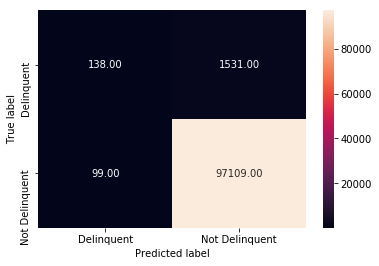

In [38]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Delinquent", "Not Delinquent"] , yticklabels = ["Delinquent", "Not Delinquent"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Building Decision Tree Model.

In [16]:
import sklearn.tree as dt

In [17]:
import sklearn.ensemble as en

In [18]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
clf_tree=DecisionTreeClassifier(max_depth=3)
clf_tree.fit(train_data.iloc[:,2:], train_data['SeriousDlqin2yrs'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
pd.DataFrame(clf_tree.predict_proba(train_data.iloc[:,2:])).head()

,0,1
0,0.762383,0.237617
1,0.911903,0.088097
2,0.600687,0.399313
3,0.981770,0.018230
4,0.762383,0.237617
5,0.981770,0.018230
6,0.981770,0.018230
7,0.911903,0.088097
8,0.981770,0.018230
9,0.911903,0.088097


In [22]:
tree_train_pred=pd.DataFrame({'predicted':clf_tree.predict(train_data.iloc[:,2:]),'actual':train_data['SeriousDlqin2yrs']})

In [23]:
tree_train_pred

,actual,predicted
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
9,0,0
10,0,0


In [24]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.935143350036967

In [27]:
tree_test_pred = pd.DataFrame( { 'actual':  pred_test.new_labels,
                            'predicted': clf_tree.predict( test_data ) } )

In [28]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9879345044853707

Text(0.5,15,'Predicted label')

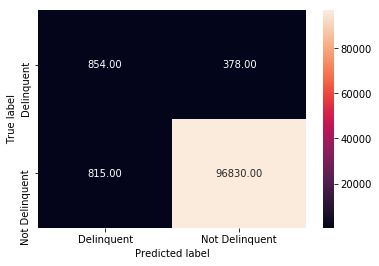

In [30]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Delinquent", "Not Delinquent"] , yticklabels = ["Delinquent", "Not Delinquent"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Building Model using Suppport Vector Machines

In [6]:
from sklearn.svm import LinearSVC

In [7]:
svm_clf = LinearSVC(random_state=0)


In [8]:
svm_clf.fit(train_data.values[:,range(2,12)], train_data['SeriousDlqin2yrs'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [10]:
train_data.values[:,range(2,12)]

array([[ 0.76612661, 45.        ,  2.        , ...,  6.        ,
         0.        ,  2.        ],
       [ 0.95715102, 40.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65818014, 38.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.24604392, 58.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , 30.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85028295, 64.        ,  0.        , ...,  2.        ,
         0.        ,  0.        ]])

In [18]:
train_data.columns


Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [22]:
svm_clf.predict(test_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
y_pred_pd=pd.DataFrame(data=svm_clf.predict(test_data),index=range(len(svm_clf.predict(test_data))))

In [26]:
y_pred_pd=y_pred_pd.rename(columns={0:'Predicted_Values'})

In [30]:
from sklearn import metrics

cm = metrics.confusion_matrix( pred_test.new_labels,
                            y_pred_pd.Predicted_Values , [1,0] )
cm

array([[  233,  1436],
       [  140, 97068]], dtype=int64)